In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

%matplotlib inline

In [2]:
Industry_data = pd.read_csv("IndustryWeek1000.csv", header=0)
Industry_data.head()

,Id,Company,Primary Industry,Country,Url,Current Rank,Prior Rank,Executive1,Executive2,Earnings Per Share Growth,...,Return On Equity,Revenue,Total Company Assets,Revenue Growth,Net Income,Earnings Per Share,Total Equity,Profit Margin,Debt To Equity Ratio,Inventory Turnover
0,1,China Petroleum & Chemical Corp. Inc.,Petroleum & Coal Products,China,www.sinopec.com,1,1.0,"Mr. Chengyu Fu, Chairman","Mr. Tianpu Wang, Ph.D., Vice-Chairman;President",-32.50%,...,5.46977,"$310,858","$222,206",-28.56%,"$4,994",($32.50),"$103,784",1.61%,0.21%,22403.1
1,2,Exxon Mobil Corp.,Petroleum & Coal Products,United States,www.exxonmobil.com,3,3.0,"Mr. Rex W. Tillerson, Chairman","Mr. Darren W. Woods, President",-49.34%,...,9.26037,"$268,882","$336,758",-34.73%,"$16,150",($49.34),"$170,811",6.01%,0.12%,16245.0
2,3,Royal Dutch Shell PLC,Petroleum & Coal Products,Netherlands,www.shell.com,2,2.0,"Ben Van Beurden, Chief Executive Officer","Simon Henry, Chief Financial Officer",-87.29%,...,1.12755,"$272,156","$340,157",-36.91%,"$1,939",($87.29),"$162,876",0.71%,0.32%,15822.0
3,4,Oil & Natural Gas Corp. Ltd.,Petroleum & Coal Products,India,www.ongcindia.com,5,6.0,"Shri R. S. Sharma, Chairman;Managing Director","Shri A. K. Hazarika, Director",-22.96%,...,0.78268,"$252,288","$53,860",NaN,"$2,135",($22.96),"$27,287",0.85%,0.26%,1525.6
4,5,Toyota Motor Corp.,Motor Vehicles,Japan,www.toyota.co.jp,6,8.0,"Mr. Takeshi Uchiyamada, Chairman","Mr. Akio Toyoda, President",6.94%,...,13.7758,"$235,946","$393,984",4.29%,"$19,211",$6.94,"$143,103",8.14%,0.57%,17125.1


In [3]:
Industry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1000 non-null   int64  
 1   Company                    1000 non-null   object 
 2   Primary Industry           1000 non-null   object 
 3   Country                    1000 non-null   object 
 4   Url                        989 non-null    object 
 5   Current Rank               1000 non-null   int64  
 6   Prior Rank                 930 non-null    float64
 7   Executive1                 1000 non-null   object 
 8   Executive2                 973 non-null    object 
 9   Earnings Per Share Growth  855 non-null    object 
 10  Cost Of Goods Sold         0 non-null      float64
 11  Current Liabilities        994 non-null    object 
 12  Total Assets               994 non-null    object 
 13  Long Term Debt             953 non-null    float6

In [4]:
IDA = Industry_data.drop(['Prior Rank','Company','Id','Url','Executive1','Executive2','Cost Of Goods Sold'], axis=1)
IDEA = IDA.drop(index=0)
IDEA.head()


,Primary Industry,Country,Current Rank,Earnings Per Share Growth,Current Liabilities,Total Assets,Long Term Debt,Return On Equity,Revenue,Total Company Assets,Revenue Growth,Net Income,Earnings Per Share,Total Equity,Profit Margin,Debt To Equity Ratio,Inventory Turnover
1,Petroleum & Coal Products,United States,3,-49.34%,"$53,976","$42,623",19925.00,9.26037,"$268,882","$336,758",-34.73%,"$16,150",($49.34),"$170,811",6.01%,0.12%,16245.0
2,Petroleum & Coal Products,Netherlands,2,-87.29%,"$70,948","$93,358",52849.00,1.12755,"$272,156","$340,157",-36.91%,"$1,939",($87.29),"$162,876",0.71%,0.32%,15822.0
3,Petroleum & Coal Products,India,5,-22.96%,NaN,NaN,6996.46,0.78268,"$252,288","$53,860",NaN,"$2,135",($22.96),"$27,287",0.85%,0.26%,1525.6
4,Motor Vehicles,Japan,6,6.94%,"$133,947","$151,268",81177.10,13.7758,"$235,946","$393,984",4.29%,"$19,211",$6.94,"$143,103",8.14%,0.57%,17125.1
5,Computers & Other Electronic Products,United States,7,42.95%,"$80,610","$89,378",53463.00,47.8668,"$233,715","$290,479",27.86%,"$53,394",$42.95,"$119,355",22.85%,0.45%,2349.0


In [5]:
IDEA.describe()

,Current Rank,Long Term Debt,Inventory Turnover
count,999.000000,952.000000,991.000000
mean,501.000000,5131.814315,2033.854666
std,288.530761,10697.855663,3434.813312
min,2.000000,0.044499,21.893100
25%,251.500000,735.093250,557.112000
50%,501.000000,1788.410000,1016.000000
75%,750.500000,5028.025000,2048.045000
max,1000.000000,145301.000000,47257.000000


In [6]:
df = IDEA

df.loc[2, 'Earnings Per Share Growth'] = np.nan
df.loc[3, 'Current Liabilities'] = np.nan
df.loc[1, 'Total Assets'] = np.nan

print(df.isnull().sum())

numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=[object]).columns

df[numerical_cols] = df[numerical_cols].apply(lambda x: x.fillna(x.mean()))

for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.isnull().sum())
print(df)

Primary Industry               0
Country                        0
Current Rank                   0
Earnings Per Share Growth    146
Current Liabilities            6
Total Assets                   7
Long Term Debt                47
Return On Equity              12
Revenue                        0
Total Company Assets           0
Revenue Growth                 6
Net Income                     0
Earnings Per Share           145
Total Equity                   6
Profit Margin                  0
Debt To Equity Ratio          53
Inventory Turnover             8
dtype: int64
Primary Industry               0
Country                        0
Current Rank                   0
Earnings Per Share Growth    146
Current Liabilities            6
Total Assets                   7
Long Term Debt                 0
Return On Equity              12
Revenue                        0
Total Company Assets           0
Revenue Growth                 6
Net Income                     0
Earnings Per Share           1

In [7]:
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include=object).columns

df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

df['Debt To Equity Ratio'] = pd.to_numeric(df['Debt To Equity Ratio'].str.rstrip('%'), errors='coerce') / 100
df.dropna(subset=['Debt To Equity Ratio'], inplace=True)
df.reset_index(drop=True, inplace=True)

print(df.isnull().sum())
print(df)

Primary Industry             0
Country                      0
Current Rank                 0
Earnings Per Share Growth    0
Current Liabilities          0
Total Assets                 0
Long Term Debt               0
Return On Equity             0
Revenue                      0
Total Company Assets         0
Revenue Growth               0
Net Income                   0
Earnings Per Share           0
Total Equity                 0
Profit Margin                0
Debt To Equity Ratio         0
Inventory Turnover           0
dtype: int64
                          Primary Industry         Country  Current Rank  \
0                Petroleum & Coal Products   United States             3   
1                Petroleum & Coal Products     Netherlands             2   
2                Petroleum & Coal Products           India             5   
3                           Motor Vehicles           Japan             6   
4    Computers & Other Electronic Products   United States             7   
..  

In [8]:
industry_counts = df['Primary Industry'].value_counts()

print(industry_counts)

Primary Industry
Petroleum & Coal Products                 118
Computers & Other Electronic Products      91
Chemicals                                  90
Food                                       83
Primary Metals                             67
Machinery                                  58
Fabricated Metal Products                  49
Motor Vehicles                             48
Pharmaceuticals                            47
Miscellaneous                              34
Motor Vehicle Parts                        33
Electrical Equipment & Appliances          31
Paper                                      26
Beverages                                  26
Stone, Clay, Glass & Concrete Products     25
Communications Equipment                   21
Aerospace & Defense                        19
Apparel                                    19
Railcars, Ships, & Other Trans. Equip.     16
Medical Instruments & Equipment            13
Rubber Products                            12
Instruments      

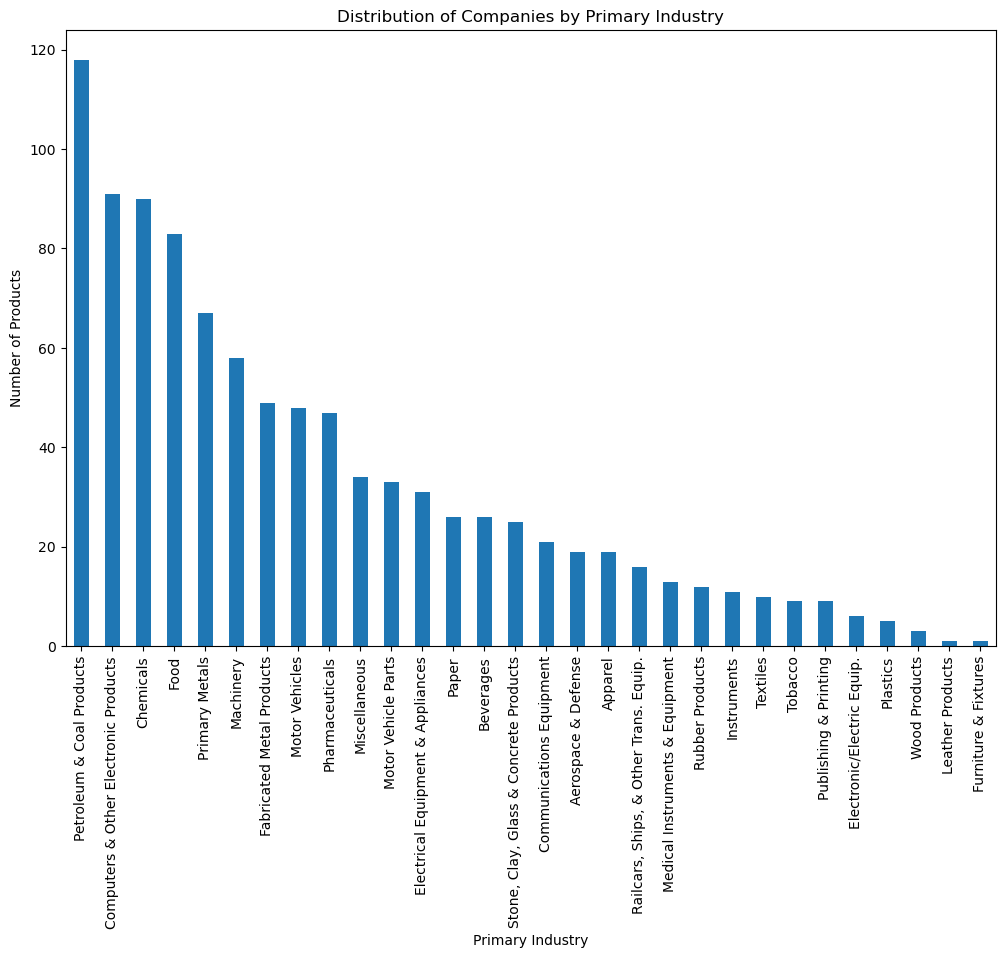

In [9]:
industry_counts.plot(kind='bar', figsize=(12, 8))
plt.title('Distribution of Companies by Primary Industry')
plt.xlabel('Primary Industry')
plt.ylabel('Number of Products')
plt.show()

Country
United States                                       266
Japan                                               182
China                                                81
France                                               42
Germany                                              38
Korea                                                35
Taiwan Province of China                             34
United Kingdom                                       33
Hong Kong Special Administrative Region of China     23
Switzerland                                          22
Canada                                               20
India                                                18
Sweden                                               13
Russian Federation                                   12
Ireland                                              12
Netherlands                                          11
Mexico                                               11
Thailand                                

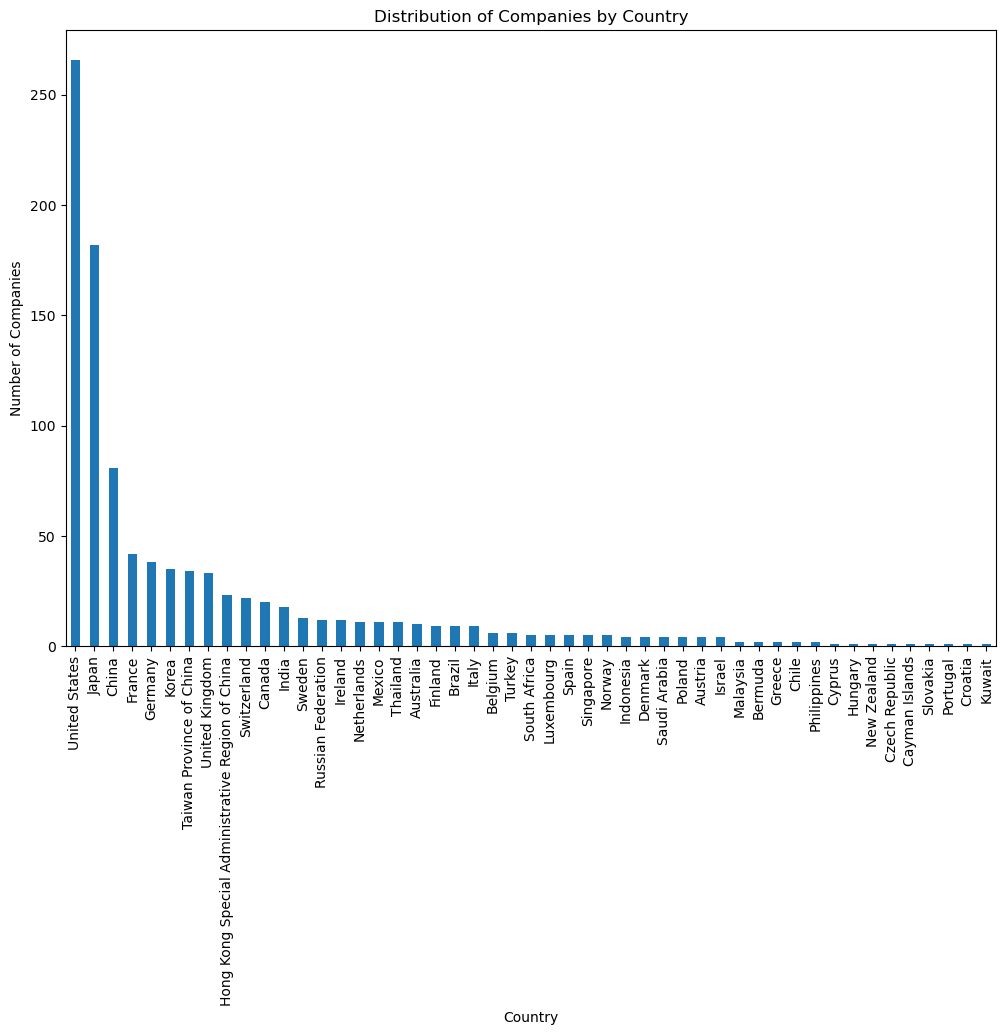

In [10]:
country_counts = df['Country'].value_counts()
print(country_counts)


country_counts.plot(kind='bar', figsize=(12, 8))
plt.title('Distribution of Companies by Country')
plt.xlabel('Country')
plt.ylabel('Number of Companies')
plt.show()

In [11]:
df

,Primary Industry,Country,Current Rank,Earnings Per Share Growth,Current Liabilities,Total Assets,Long Term Debt,Return On Equity,Revenue,Total Company Assets,Revenue Growth,Net Income,Earnings Per Share,Total Equity,Profit Margin,Debt To Equity Ratio,Inventory Turnover
0,Petroleum & Coal Products,United States,3,-49.34%,"$53,976","$2,320",19925.000000,9.26037,"$268,882","$336,758",-34.73%,"$16,150",($49.34),"$170,811",6.01%,0.0012,16245.000
1,Petroleum & Coal Products,Netherlands,2,NM,"$70,948","$93,358",52849.000000,1.12755,"$272,156","$340,157",-36.91%,"$1,939",($87.29),"$162,876",0.71%,0.0032,15822.000
2,Petroleum & Coal Products,India,5,-22.96%,$881,"$2,320",6996.460000,0.78268,"$252,288","$53,860",-5.74%,"$2,135",($22.96),"$27,287",0.85%,0.0026,1525.600
3,Motor Vehicles,Japan,6,6.94%,"$133,947","$151,268",81177.100000,13.7758,"$235,946","$393,984",4.29%,"$19,211",$6.94,"$143,103",8.14%,0.0057,17125.100
4,Computers & Other Electronic Products,United States,7,42.95%,"$80,610","$89,378",53463.000000,47.8668,"$233,715","$290,479",27.86%,"$53,394",$42.95,"$119,355",22.85%,0.0045,2349.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,Machinery,China,996,-87.50%,"$4,647","$11,484",3369.180000,0.204423,"$3,195","$14,431",-19.72%,$12,($87.50),"$6,149",0.40%,0.0055,2168.420
977,Motor Vehicle Parts,Japan,998,NM,$551,"$2,311",664.780000,9.03743,"$3,183","$4,370",10.25%,$255,NM,"$2,815",8.04%,0.0024,682.192
978,Food,Kuwait,997,NM,$780,"$1,189",27.054500,12.0675,"$3,189","$2,281",4.98%,$144,NM,"$1,185",4.53%,0.0002,378.589
979,Aerospace & Defense,United States,1000,NM,$881,"$2,320",5131.814315,10.5925,"$3,173","$5,504",-33.53%,$202,NM,"$1,777",6.38%,0.0000,196.114


In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder_primary = LabelEncoder()
label_encoder_country = LabelEncoder()

df['Primary Industry'] = label_encoder_primary.fit_transform(df['Primary Industry'])
df['Country'] = label_encoder_country.fit_transform(df['Country'])

encoded_values_primary = label_encoder_primary.transform(label_encoder_primary.classes_)
encoded_values_country = label_encoder_country.transform(label_encoder_country.classes_)

print("Encoded values for 'Primary Industry':")
print(encoded_values_primary)

print("\nEncoded values for 'Country':")
print(encoded_values_country)

Encoded values for 'Primary Industry':
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

Encoded values for 'Country':
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


In [13]:
df['Primary Industry']

0      19
1      19
2      19
3      17
4       5
       ..
976    13
977    16
978     9
979     0
980     9
Name: Primary Industry, Length: 981, dtype: int64

In [14]:
df

,Primary Industry,Country,Current Rank,Earnings Per Share Growth,Current Liabilities,Total Assets,Long Term Debt,Return On Equity,Revenue,Total Company Assets,Revenue Growth,Net Income,Earnings Per Share,Total Equity,Profit Margin,Debt To Equity Ratio,Inventory Turnover
0,19,48,3,-49.34%,"$53,976","$2,320",19925.000000,9.26037,"$268,882","$336,758",-34.73%,"$16,150",($49.34),"$170,811",6.01%,0.0012,16245.000
1,19,30,2,NM,"$70,948","$93,358",52849.000000,1.12755,"$272,156","$340,157",-36.91%,"$1,939",($87.29),"$162,876",0.71%,0.0032,15822.000
2,19,19,5,-22.96%,$881,"$2,320",6996.460000,0.78268,"$252,288","$53,860",-5.74%,"$2,135",($22.96),"$27,287",0.85%,0.0026,1525.600
3,17,24,6,6.94%,"$133,947","$151,268",81177.100000,13.7758,"$235,946","$393,984",4.29%,"$19,211",$6.94,"$143,103",8.14%,0.0057,17125.100
4,5,48,7,42.95%,"$80,610","$89,378",53463.000000,47.8668,"$233,715","$290,479",27.86%,"$53,394",$42.95,"$119,355",22.85%,0.0045,2349.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,13,8,996,-87.50%,"$4,647","$11,484",3369.180000,0.204423,"$3,195","$14,431",-19.72%,$12,($87.50),"$6,149",0.40%,0.0055,2168.420
977,16,24,998,NM,$551,"$2,311",664.780000,9.03743,"$3,183","$4,370",10.25%,$255,NM,"$2,815",8.04%,0.0024,682.192
978,9,26,997,NM,$780,"$1,189",27.054500,12.0675,"$3,189","$2,281",4.98%,$144,NM,"$1,185",4.53%,0.0002,378.589
979,0,48,1000,NM,$881,"$2,320",5131.814315,10.5925,"$3,173","$5,504",-33.53%,$202,NM,"$1,777",6.38%,0.0000,196.114


In [15]:
primary_industry_mapping = {i: category for i, category in enumerate(label_encoder_primary.classes_)}
country_mapping = {i: category for i, category in enumerate(label_encoder_country.classes_)}

print("Encoded values for 'Primary Industry':")
for encoded_value, category in primary_industry_mapping.items():
    print(f"{encoded_value}: {category}")

print("\nEncoded values for 'Country':")
for encoded_value, category in country_mapping.items():
    print(f"{encoded_value}: {category}")

Encoded values for 'Primary Industry':
0: Aerospace & Defense
1: Apparel
2: Beverages
3: Chemicals
4: Communications Equipment
5: Computers & Other Electronic Products
6: Electrical Equipment & Appliances
7: Electronic/Electric Equip.
8: Fabricated Metal Products
9: Food
10: Furniture & Fixtures
11: Instruments
12: Leather Products
13: Machinery
14: Medical Instruments & Equipment
15: Miscellaneous
16: Motor Vehicle Parts
17: Motor Vehicles
18: Paper
19: Petroleum & Coal Products
20: Pharmaceuticals
21: Plastics
22: Primary Metals
23: Publishing & Printing
24: Railcars, Ships, & Other Trans. Equip.
25: Rubber Products
26: Stone, Clay, Glass & Concrete Products
27: Textiles
28: Tobacco
29: Wood Products

Encoded values for 'Country':
0: Australia
1: Austria
2: Belgium
3: Bermuda
4: Brazil
5: Canada
6: Cayman Islands
7: Chile
8: China
9: Croatia
10: Cyprus
11: Czech Republic
12: Denmark
13: Finland
14: France
15: Germany
16: Greece
17: Hong Kong Special Administrative Region of China
18:

In [16]:
df.replace('NM', pd.NA, inplace=True)

df['Return On Equity'] = pd.to_numeric(df['Return On Equity'], errors='coerce')

df.dropna(subset=['Earnings Per Share Growth', 'Earnings Per Share'], inplace=True)

mean_return_on_equity = df['Return On Equity'].mean()

print("Mean for 'Return On Equity' after removing 'NM' values:", mean_return_on_equity)

Mean for 'Return On Equity' after removing 'NM' values: 19.37923015161725


In [17]:
df.reset_index(drop=True, inplace=True)
df.index += 1
df

,Primary Industry,Country,Current Rank,Earnings Per Share Growth,Current Liabilities,Total Assets,Long Term Debt,Return On Equity,Revenue,Total Company Assets,Revenue Growth,Net Income,Earnings Per Share,Total Equity,Profit Margin,Debt To Equity Ratio,Inventory Turnover
1,19,48,3,-49.34%,"$53,976","$2,320",19925.0000,9.260370,"$268,882","$336,758",-34.73%,"$16,150",($49.34),"$170,811",6.01%,0.0012,16245.000
2,19,19,5,-22.96%,$881,"$2,320",6996.4600,0.782680,"$252,288","$53,860",-5.74%,"$2,135",($22.96),"$27,287",0.85%,0.0026,1525.600
3,17,24,6,6.94%,"$133,947","$151,268",81177.1000,13.775800,"$235,946","$393,984",4.29%,"$19,211",$6.94,"$143,103",8.14%,0.0057,17125.100
4,5,48,7,42.95%,"$80,610","$89,378",53463.0000,47.866800,"$233,715","$290,479",27.86%,"$53,394",$42.95,"$119,355",22.85%,0.0045,2349.000
5,19,47,9,-273.31%,"$54,724","$70,602",46224.0000,-5.816530,"$225,316","$261,832",-37.02%,"($6,482)",($273.31),"$97,216",-2.88%,0.0048,14142.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,3,24,993,-17.42%,$908,"$2,496",184.8240,6.701300,"$3,212","$4,289",-4.30%,$199,($17.42),"$2,941",6.22%,0.0006,643.448
745,9,48,995,17.94%,$275,$847,1221.7400,6.531730,"$3,206","$3,702",8.84%,$114,$17.94,"$1,854",3.58%,0.0066,584.115
746,9,14,994,50.53%,$895,"$1,612",498.3990,14.357600,"$3,211","$3,414",5.95%,$200,$50.53,"$1,607",6.26%,0.0031,295.961
747,13,8,996,-87.50%,"$4,647","$11,484",3369.1800,0.204423,"$3,195","$14,431",-19.72%,$12,($87.50),"$6,149",0.40%,0.0055,2168.420


In [18]:
print(df.dtypes)

Primary Industry               int64
Country                        int64
Current Rank                   int64
Earnings Per Share Growth     object
Current Liabilities           object
Total Assets                  object
Long Term Debt               float64
Return On Equity             float64
Revenue                       object
Total Company Assets          object
Revenue Growth                object
Net Income                    object
Earnings Per Share            object
Total Equity                  object
Profit Margin                 object
Debt To Equity Ratio         float64
Inventory Turnover           float64
dtype: object


In [19]:
print(df['Earnings Per Share Growth'].dtype)

object


In [20]:
df = df.replace({'\$': '', '\(': '-', '\)': '', ',': '', ' ': ''}, regex=True)
percent_columns = ['Revenue Growth', 'Profit Margin','Earnings Per Share','Earnings Per Share Growth']
df[percent_columns] = df[percent_columns].replace({'%': ''}, regex=True).astype(float) / 100
# Convert all columns to numeric type
df = df.apply(pd.to_numeric, errors='ignore')

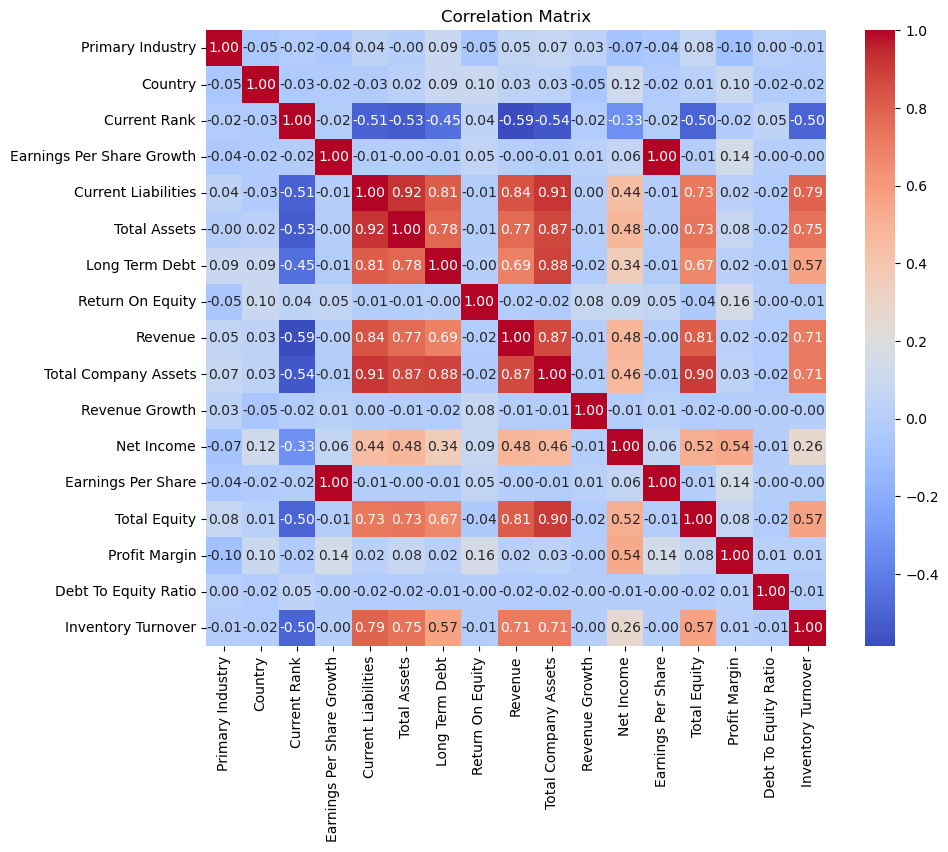

In [21]:
correlation_matrix = df.corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [22]:
strong_correlations = correlation_matrix.abs() > 0.7
strong_correlation_pairs = [(i, j) for i in range(len(correlation_matrix.columns)) for j in range(i+1, len(correlation_matrix.columns)) if strong_correlations.iloc[i, j]]

print("Pairs of variables with strong correlations (> 0.7):")
for pair in strong_correlation_pairs:
    print(correlation_matrix.columns[pair[0]], "-", correlation_matrix.columns[pair[1]])

Pairs of variables with strong correlations (> 0.7):
Earnings Per Share Growth - Earnings Per Share
Current Liabilities - Total Assets
Current Liabilities - Long Term Debt
Current Liabilities - Revenue
Current Liabilities - Total Company Assets
Current Liabilities - Total Equity
Current Liabilities - Inventory Turnover
Total Assets - Long Term Debt
Total Assets - Revenue
Total Assets - Total Company Assets
Total Assets - Total Equity
Total Assets - Inventory Turnover
Long Term Debt - Total Company Assets
Revenue - Total Company Assets
Revenue - Total Equity
Revenue - Inventory Turnover
Total Company Assets - Total Equity
Total Company Assets - Inventory Turnover


In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.impute import SimpleImputer

X = df.drop(columns=['Inventory Turnover'])
y = df['Inventory Turnover']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

selector = SelectKBest(score_func=f_regression, k=6)  
X_selected = selector.fit_transform(X_imputed, y)

X_selected_features = X.columns[selector.get_support()]

print("Selected features:")
print(X_selected_features)

Selected features:
Index(['Current Liabilities', 'Total Assets', 'Long Term Debt', 'Revenue',
       'Total Company Assets', 'Total Equity'],
      dtype='object')


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X_selected = df[X_selected_features]
y = df['Inventory Turnover']

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

regressor = RandomForestRegressor(n_estimators=100, random_state=42)

regressor.fit(X_train_imputed, y_train)

X_test_imputed = imputer.transform(X_test)

y_pred = regressor.predict(X_test_imputed)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 8122485.658688694


R²: 0.6488469145943294
Mean Absolute Error: 1128.27664922888


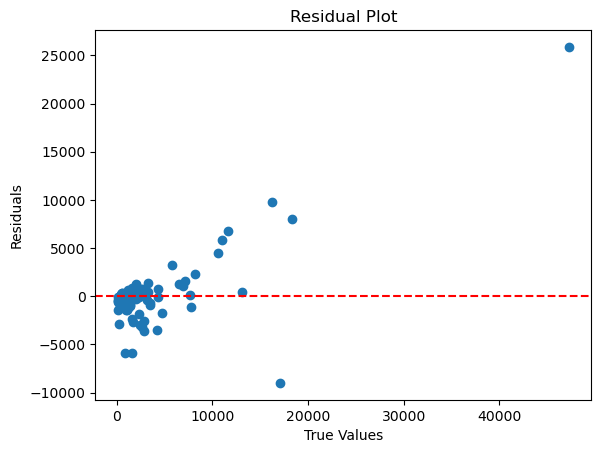

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R²:", r2)
print("Mean Absolute Error:", mae)

# Residual plot
plt.scatter(y_test, y_test - y_pred)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_regression, k=7)),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

selected_features = numerical_features[model.named_steps['feature_selection'].get_support()]
print("Selected features:", selected_features)

Mean Squared Error: 8713447.07321422
Selected features: Index(['Current Rank', 'Current Liabilities', 'Total Assets', 'Long Term Debt',
       'Revenue', 'Total Company Assets', 'Total Equity'],
      dtype='object')


In [27]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation scores:", -cv_scores)
print("Average cross-validation score:", -cv_scores.mean())

Cross-validation scores: [42561075.31259508  2140390.66683864   625775.39279888  1369901.33783448
   310294.52851279]
Average cross-validation score: 9401487.447715973


                Feature  Importance
1   Current Liabilities    0.437570
2          Total Assets    0.307057
3        Long Term Debt    0.075026
0          Current Rank    0.055318
5  Total Company Assets    0.055093
4               Revenue    0.050742
6          Total Equity    0.019194


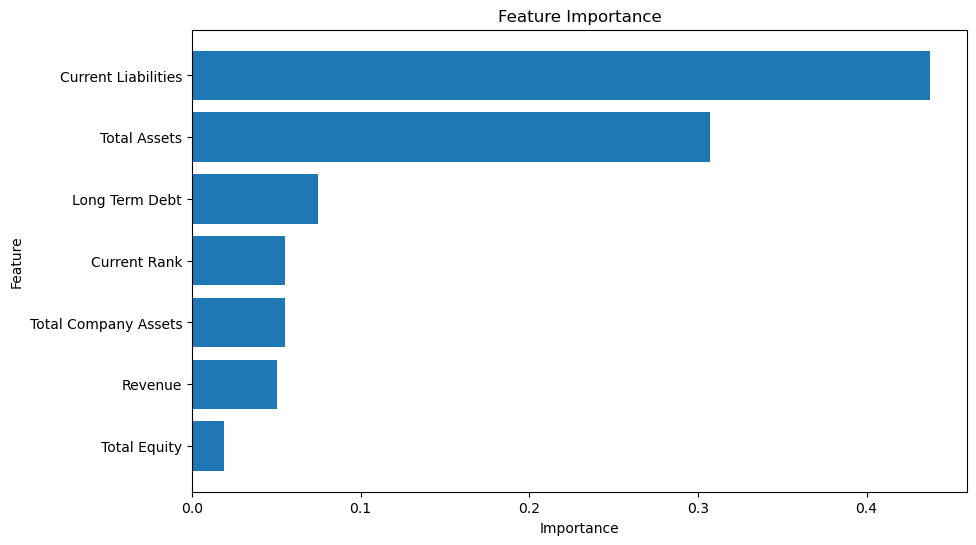

In [28]:
from sklearn.feature_selection import SelectFromModel

param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)
final_model = grid_search.best_estimator_
final_model.fit(X_train, y_train)

importances = final_model.named_steps['regressor'].feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
import optuna
from hyperopt import hp, fmin, tpe, Trials

param_grid_random = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(model, param_distributions=param_grid_random, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters found by random search:", random_search.best_params_)
print("Best score found by random search:", random_search.best_score_)


Best parameters found by random search: {'regressor__n_estimators': 100, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 4, 'regressor__max_depth': 10}
Best score found by random search: -4353027.0877680015


In [30]:
param_grid_bayes = {
    'regressor__n_estimators': (100, 1000),
    'regressor__max_depth': (1, 50),
    'regressor__min_samples_split': (2, 10),
    'regressor__min_samples_leaf': (1, 10)
}

bayes_search = BayesSearchCV(model, param_grid_bayes, n_iter=50, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
bayes_search.fit(X_train, y_train)

print("Best parameters found by Bayesian optimization:", bayes_search.best_params_)
print("Best score found by Bayesian optimization:", bayes_search.best_score_)

Best parameters found by Bayesian optimization: OrderedDict([('regressor__max_depth', 28), ('regressor__min_samples_leaf', 5), ('regressor__min_samples_split', 10), ('regressor__n_estimators', 136)])
Best score found by Bayesian optimization: -4378589.028440029


In [31]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
boosting_regressor = GradientBoostingRegressor()

imputer = SimpleImputer(strategy='mean')

# Define the boosting regressor
boosting_regressor = GradientBoostingRegressor()

# Define the pipeline
pipeline = Pipeline([
    ('imputer', imputer),
    ('regressor', boosting_regressor)
])

# Define the hyperparameters to search
param_dist = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5]
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# Get the best model
best_boosting_model = random_search.best_estimator_

# Evaluate the best model
y_pred = best_boosting_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 8786530.817183293


/Users/cristianchoco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


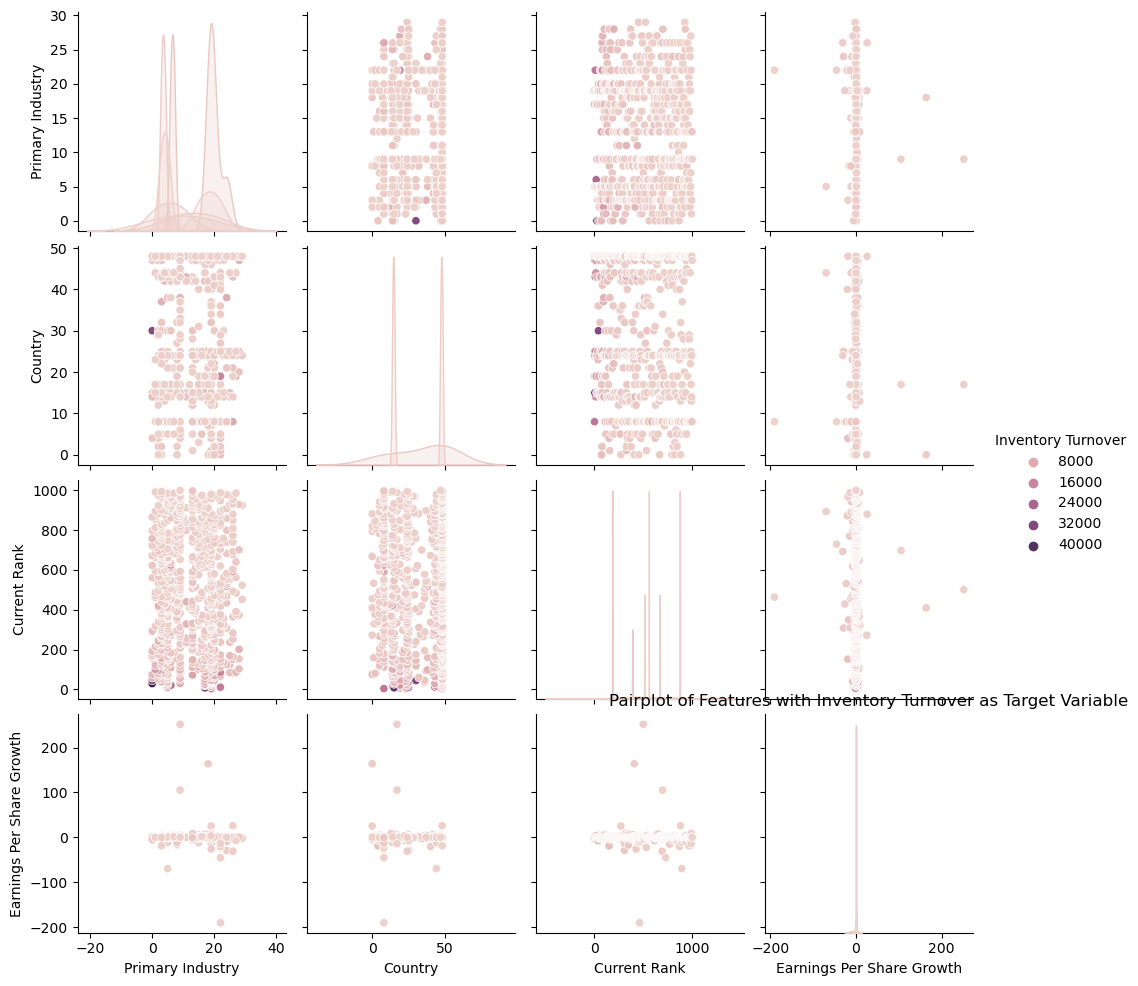

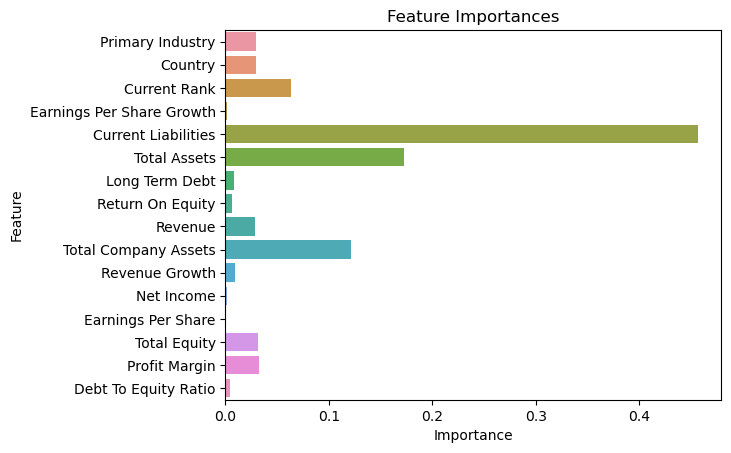

In [32]:
sns.pairplot(data=df, vars=['Primary Industry', 'Country', 'Current Rank', 'Earnings Per Share Growth'], hue='Inventory Turnover')
plt.title('Pairplot of Features with Inventory Turnover as Target Variable')
plt.show()

# Feature Importance Bar Graphs
# Example: Feature Importances of a RandomForestRegressor
feature_importances = best_boosting_model.named_steps['regressor'].feature_importances_
features = df.columns[:-1]  # Assuming the target variable is the last column
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [33]:
print(df.columns)

Index(['Primary Industry', 'Country', 'Current Rank',
       'Earnings Per Share Growth', 'Current Liabilities', 'Total Assets',
       'Long Term Debt', 'Return On Equity', 'Revenue', 'Total Company Assets',
       'Revenue Growth', 'Net Income', 'Earnings Per Share', 'Total Equity',
       'Profit Margin', 'Debt To Equity Ratio', 'Inventory Turnover'],
      dtype='object')
